In [5]:
import pandas as pd
import numpy as np

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
 df=pd.read_csv('Ecommerce customers.csv')

In [8]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
#comparing time on website and yearly amount spent

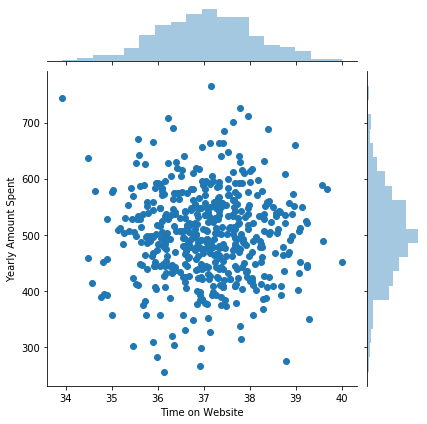

In [12]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

##comparing time on app and yealy amount spent

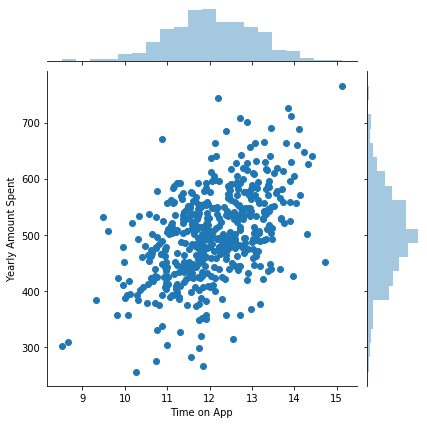

In [13]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

#comparing time on app and length of membership

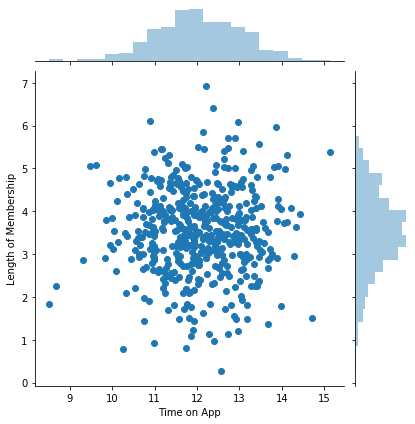

In [14]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df)

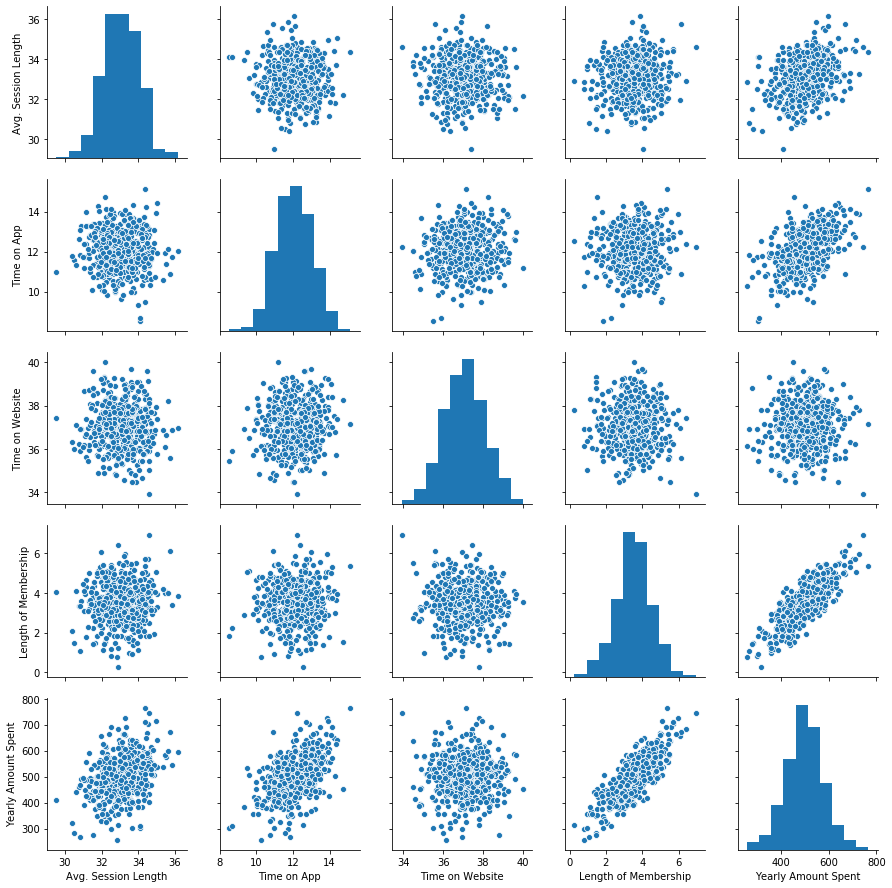

In [15]:
sns.pairplot(df)

#Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

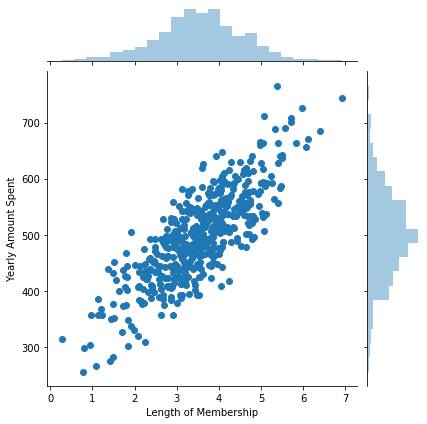

In [16]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

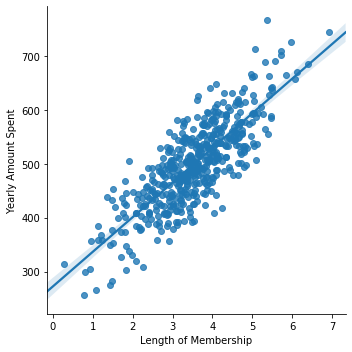

In [17]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

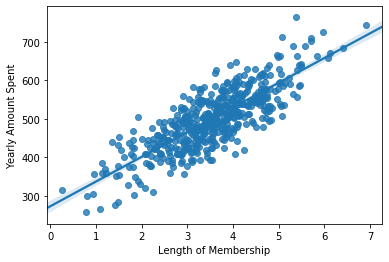

In [18]:
sns.regplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

In [19]:
x=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [20]:
y=df['Yearly Amount Spent']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

In [23]:
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
176,32.332637,11.548761,38.576516,4.773503
195,31.820998,10.771074,37.278640,3.519032
432,31.123974,12.386516,35.632112,4.288487
458,35.371876,10.572467,36.862183,4.198349
278,32.607903,13.677246,37.744700,2.871948
...,...,...,...,...
63,32.789773,11.670066,37.408748,3.414688
326,33.217188,10.999684,38.442767,4.243813
337,31.827979,12.461147,37.428997,2.974737
11,33.879361,11.584783,37.087926,3.713209


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm=LinearRegression()

In [26]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lm.coef_

array([25.91225933, 38.50812563,  0.28871629, 61.16161032])

In [28]:
predictions=lm.predict(x_test)

In [30]:
lm.intercept_

-1047.975964821279

Text(0, 0.5, 'Predicted Y')

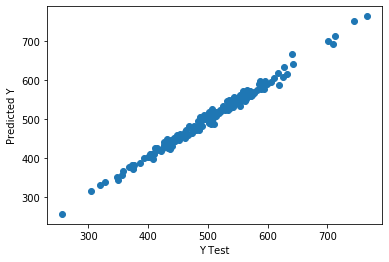

In [31]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [32]:
from sklearn import metrics

In [33]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   7.2945465883313165
MSE :   81.90726984520929
RMAE :   9.050263523522908


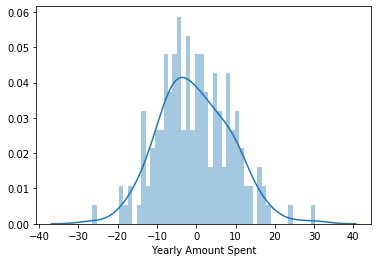

In [34]:
sns.distplot(y_test - predictions,bins=50)